In [ ]:
!pip install mlflow
import numpy as np
import pandas as pd
import mlflow

In [3]:
%pip install -q mlflow databricks-sdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.5/465.5 kB 3.5 MB/s eta 0:00:00


In [4]:
mlflow.login()

2024/03/28 19:07:57 INFO mlflow.utils.credentials: No valid Databricks credentials found, please enter your credentials...


Databricks Host (should begin with https://): https://community.cloud.databricks.com/
Username: boshevk@gmail.com
Password: ··········


2024/03/28 19:08:19 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://community.cloud.databricks.com.


In [5]:
mlflow.set_experiment("/Users/boshevk@gmail.com/Apple")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/2281726144541994', creation_time=1711650856101, experiment_id='2281726144541994', last_update_time=1711650856101, lifecycle_stage='active', name='/Users/boshevk@gmail.com/Apple', tags={'mlflow.experiment.sourceName': '/Users/boshevk@gmail.com/Apple',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'boshevk@gmail.com',
 'mlflow.ownerId': '3211198870288552'}>

In [94]:
def csv_to_df():
  df = pd.read_csv("/content/apple_quality.csv")
  return df

df = csv_to_df()
print(df)

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                           

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [96]:
missing_values = df.isnull().sum()

print(missing_values)

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [97]:
df = df.dropna()

In [98]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [99]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df['Acidity'].unique()

array([-0.49159048, -0.72280937,  2.62163647, ..., -1.33461139,
       -2.22971981,  1.59979646])

In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Quality'] = le.fit_transform(df['Quality'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 312.5 KB


<ipython-input-101-7d62db5011fa>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


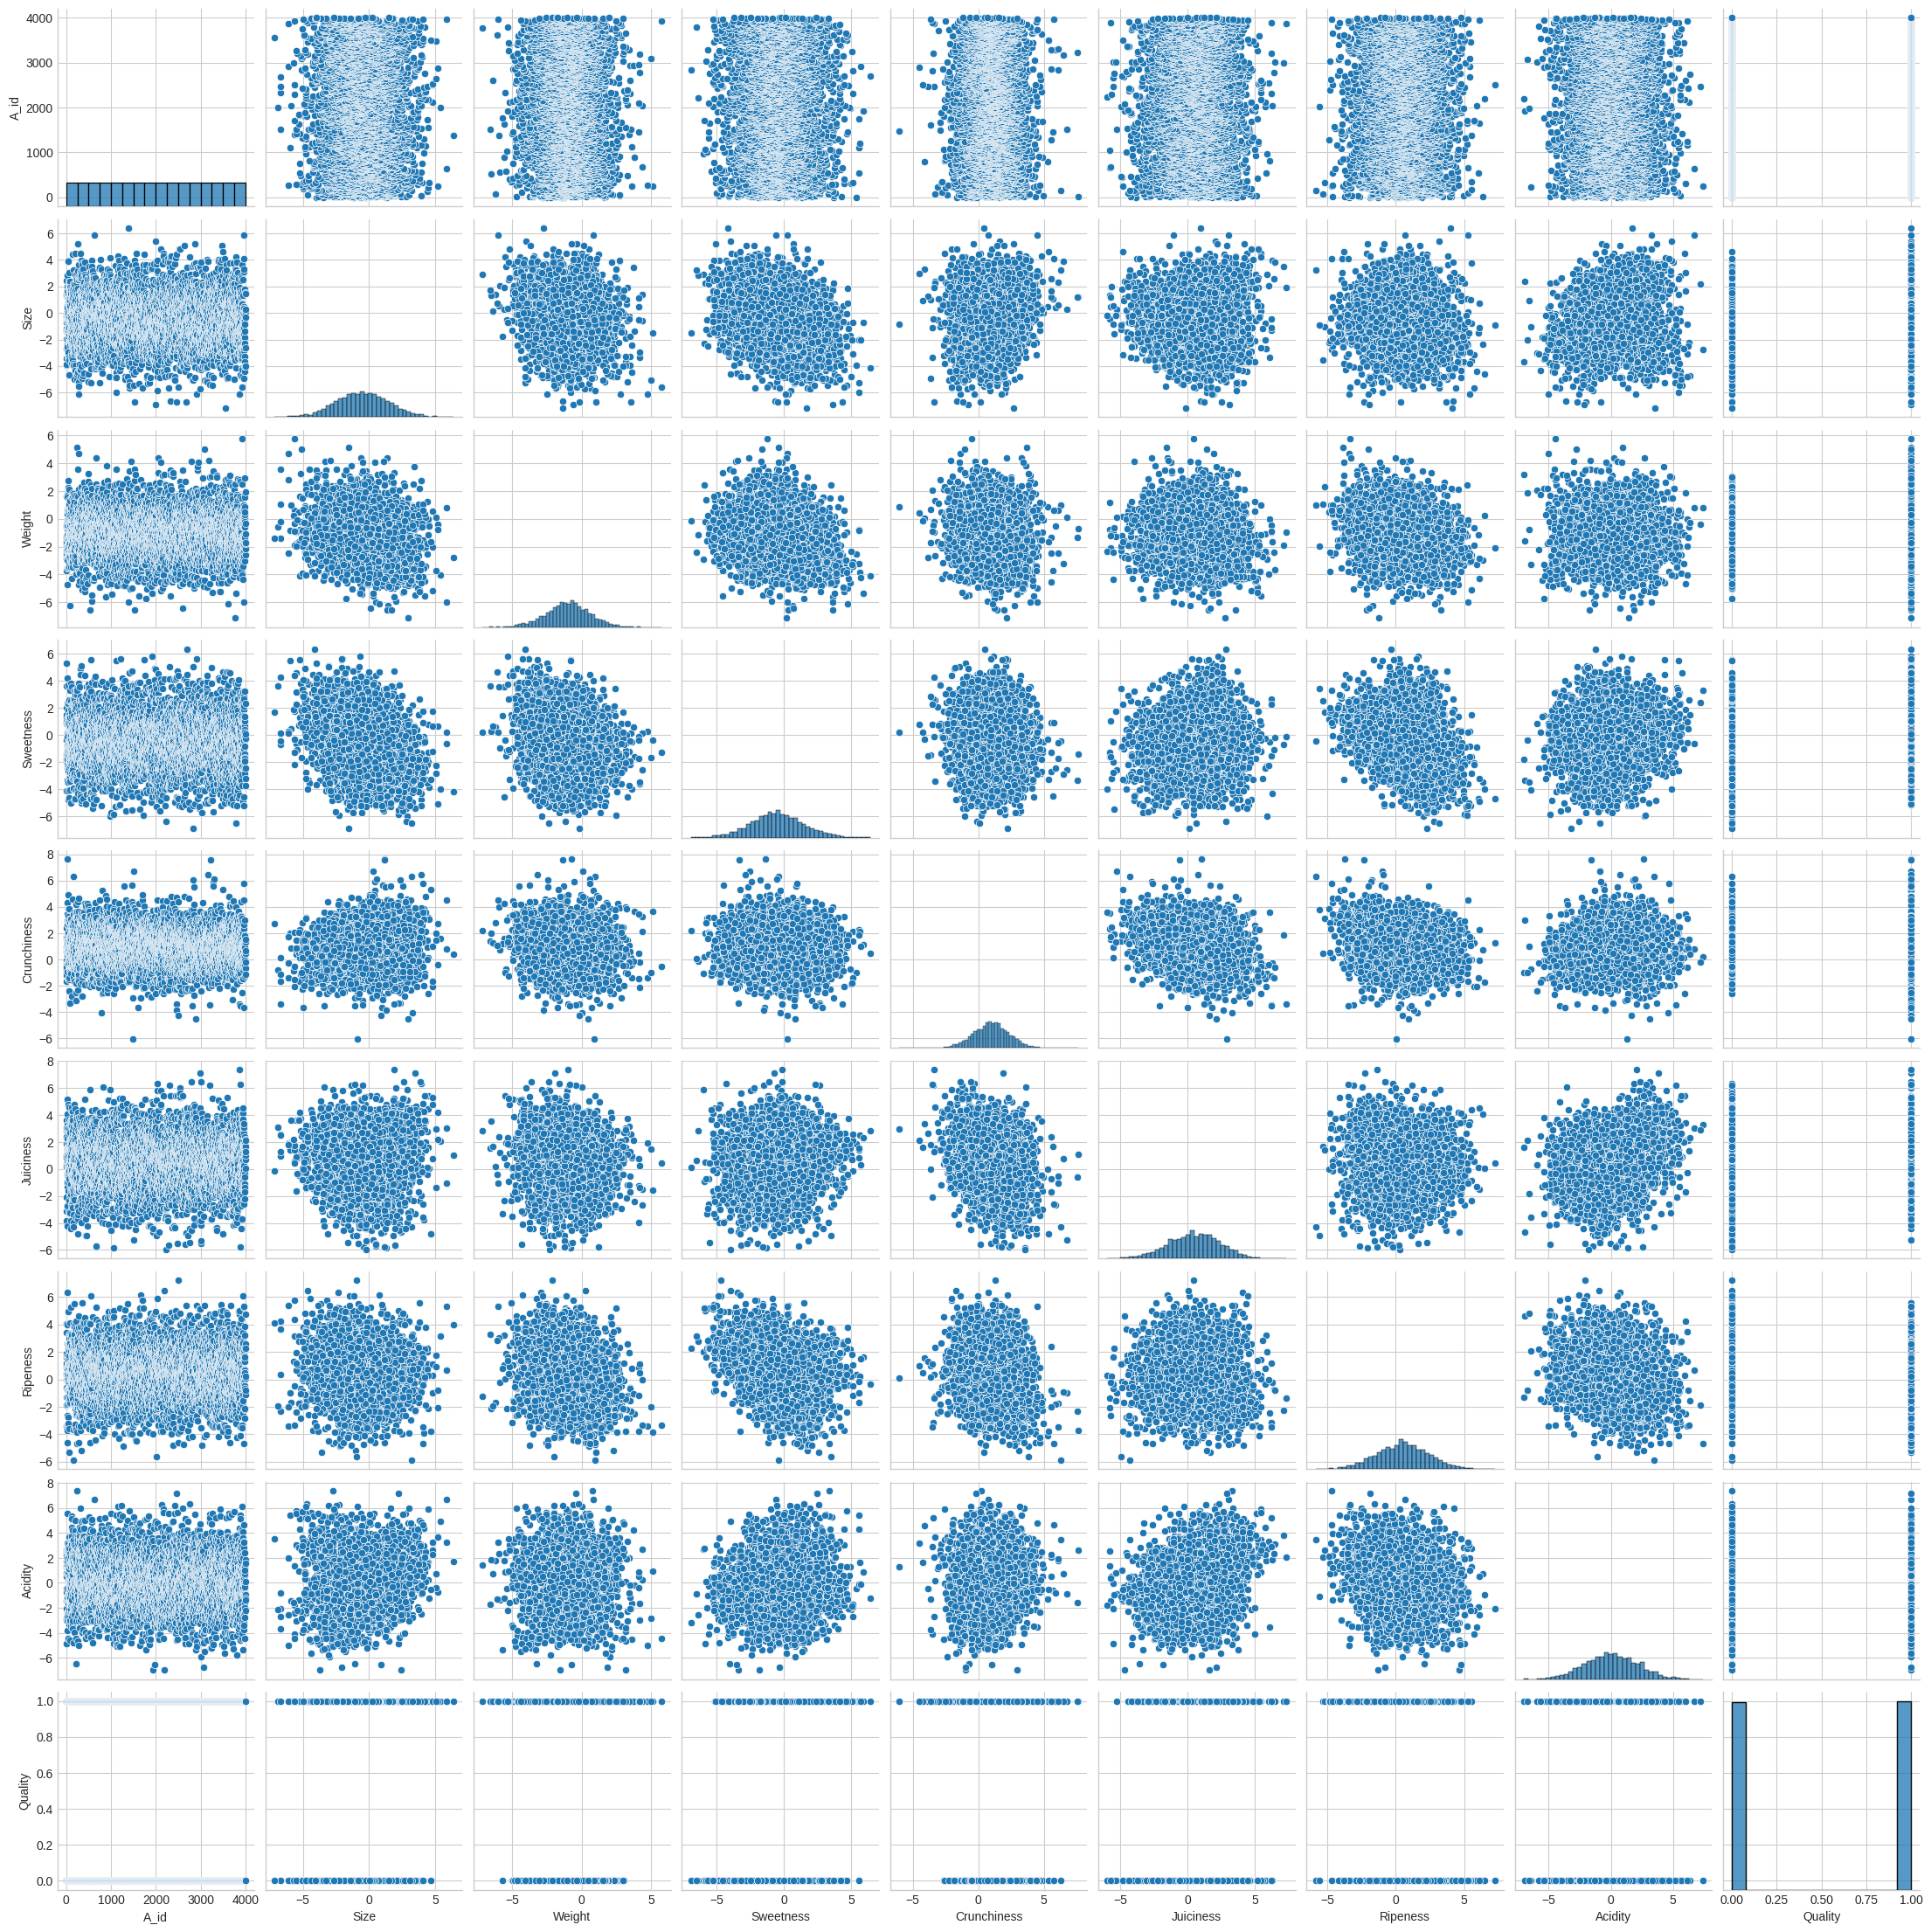

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

sns.pairplot(df)

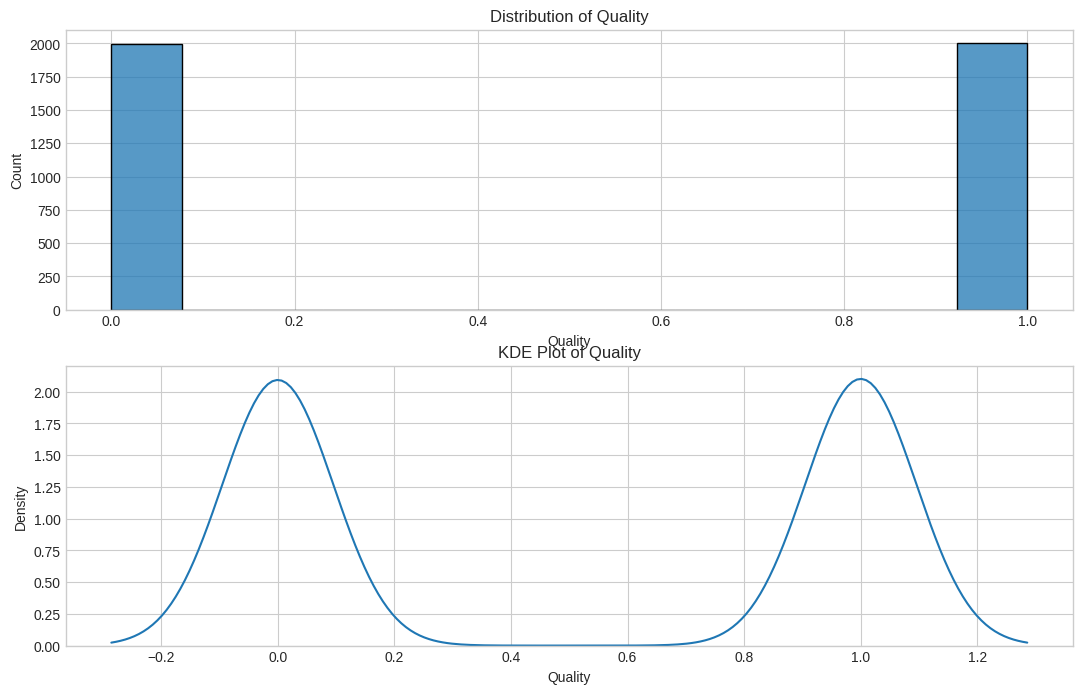

In [102]:
def visualization(data):
  fig, ax = plt.subplots(2,1, figsize = (13, 8))
  sns.histplot(data['Quality'], ax=ax[0])
  ax[0].set_title('Distribution of Quality')
   # Plot a KDE plot for 'Quality'
  sns.kdeplot(data['Quality'], ax=ax[1])
  ax[1].set_title('KDE Plot of Quality')


  plt.show()

visualization(df)

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Quality',axis = 1)
y = df['Quality']

X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, 20],
        "min_samples_split": [2, 3, 4]
  }

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv = 5)

with mlflow.start_run(run_name = "RF_baseline"):
  grid_rf.fit(X_train, Y_train)
  best_params = grid_rf.best_params_
  best_estimator = grid_rf.best_estimator_

  mlflow.set_tag("model_name", "RF")
  mlflow.log_params(best_params)

  y_pred = grid_rf.predict(X_test)

  score = accuracy_score(Y_test, y_pred)

  mlflow.log_metric("test_accuracy", score)
  mlflow.sklearn.log_model(grid_rf, "sk_models")

2024/03/28 22:16:50 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.11.3/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

In [105]:
param_grid = {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, 20],
        "objective": ["reg:logistic", "multi:softmax"]
  }

grid_xgb = GridSearchCV(XGBClassifier(),param_grid = param_grid,cv = 5)

with mlflow.start_run(run_name = "XGB"):
  grid_xgb.fit(X_train, Y_train)
  best_params = grid_xgb.best_params_
  best_estimator = grid_xgb.best_estimator_

  mlflow.set_tag("model_name", "XGB")
  mlflow.log_params(best_params)

  y_pred = grid_xgb.predict(X_test)
  score = accuracy_score(Y_test, y_pred)

  mlflow.log_metric("test_accuracy", score)
  mlflow.sklearn.log_model(grid_xgb, "sk_models")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
  

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

In [106]:
import tensorflow as tf

with mlflow.start_run(run_name = "NN"):
  model = tf.keras.Sequential([
     tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(3, activation='softmax')
  ])
  mlflow.set_tag("model_name", "NN")
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train, Y_train, epochs=150, validation_data=(X_test, Y_test))

  test_loss, test_accuracy = model.evaluate(X_test, Y_test)
  print("Test Loss:", test_loss)
  print("Test Accuracy:", test_accuracy)

  mlflow.log_metric("test_accuracy", test_accuracy)
  mlflow.tensorflow.log_model(model, "sk_models")

Epoch 1/150
107/107 [==============================] - 1s 4ms/step - loss: 0.6467 - accuracy: 0.7303 - val_loss: 0.4688 - val_accuracy: 0.8200
Epoch 2/150
107/107 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.8235 - val_loss: 0.3840 - val_accuracy: 0.8450
Epoch 3/150
107/107 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8447 - val_loss: 0.3467 - val_accuracy: 0.8667
Epoch 4/150
107/107 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8526 - val_loss: 0.3288 - val_accuracy: 0.8750
Epoch 5/150
107/107 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8574 - val_loss: 0.3114 - val_accuracy: 0.8767
Epoch 6/150
107/107 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8653 - val_loss: 0.3076 - val_accuracy: 0.8867
Epoch 7/150
107/107 [==============================] - 0s 3ms/step - loss: 0.2928 - accuracy: 0.8665 - val_loss: 0.3051 - val_accuracy: 0.8833

2024/03/28 22:18:49 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/03/28 22:18:58 WARNING mlflow.models.model: Model logged without a signature. Signatures will be required for upcoming model registry features as they validate model inputs and denote the expected schema of model outputs. Please visit https://www.mlflow.org/docs/2.11.3/models.html#set-signature-on-logged-model for instructions on setting a model signature on your logged model.


Uploading artifacts:   0%|          | 0/16 [00:00<?, ?it/s]

2024/03/28 22:18:58 INFO mlflow.store.artifact.cloud_artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


<ipython-input-115-814c9beb46fe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models[:1], y=xgb, palette=['orange'])
<ipython-input-115-814c9beb46fe>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models[1:], y=nn, palette=['blue'])


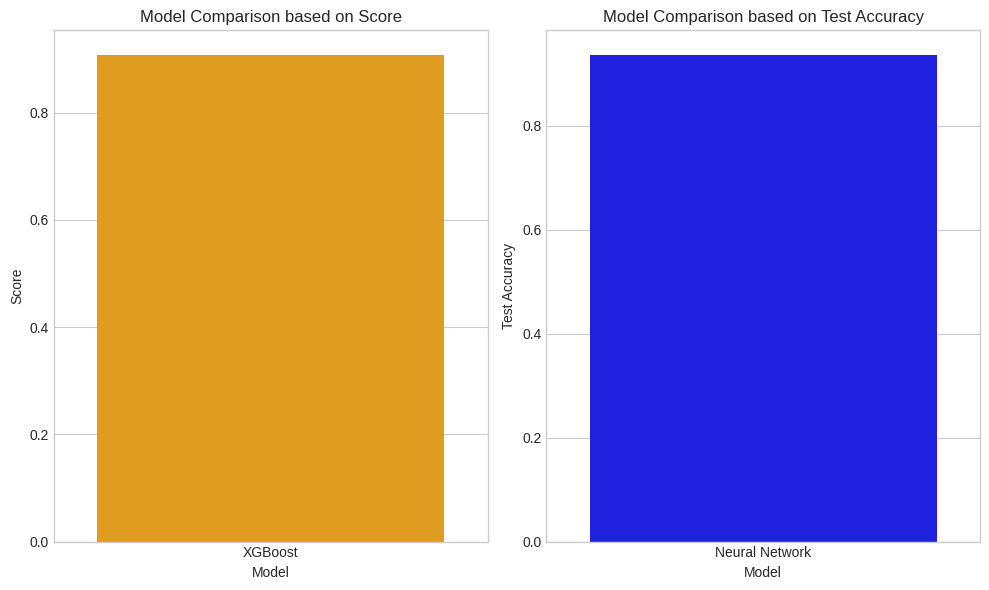

In [115]:
def compare_models(xgb, nn):
    models = ['XGBoost', 'Neural Network']

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot for scores
    plt.subplot(1, 2, 1)
    sns.barplot(x=models[:1], y=xgb, palette=['orange'])
    plt.title('Model Comparison based on Score')
    plt.ylabel('Score')
    plt.xlabel('Model')

    # Plot for test accuracies
    plt.subplot(1, 2, 2)
    sns.barplot(x=models[1:], y=nn, palette=['blue'])
    plt.title('Model Comparison based on Test Accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Model')

    plt.tight_layout()
    plt.show()

# Call the function with your results
compare_models(score, test_accuracy)